## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [403]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [404]:
X.isna().any().any() # false - нет пропущенных значений 
(X._get_numeric_data().columns == X.columns).all() # все численные значения совпадают с колонками, категориальных данных нет

True

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [407]:
KNN_scaler = StandardScaler()
selected = ["alcohol", "magnesium"]
X_KNNTrain = KNN_scaler.fit_transform(X_train[selected])
X_KNNTest = KNN_scaler.transform(X_test[selected])

ks = [1, 3, 5, 10, 15, 25]
models = [] # массив итоговых моделей нужный для следующего задания

print(f"{'NN':9}{'Train':8}{'Test':5}")
for k in ks:
    classifier = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    classifier.fit(X_KNNTrain, y_train)
    models.append(classifier)
    train = classifier.score(X_KNNTrain, y_train)
    test = classifier.score(X_KNNTest, y_test)
    print(f"{k:<9}{round(train,2):<8}{round(test,2):<5}")


NN       Train   Test 
1        1.0     0.67 
3        0.81    0.78 
5        0.75    0.72 
10       0.73    0.78 
15       0.73    0.8  
25       0.67    0.8  


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [408]:
!pip install mlxtend


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [409]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

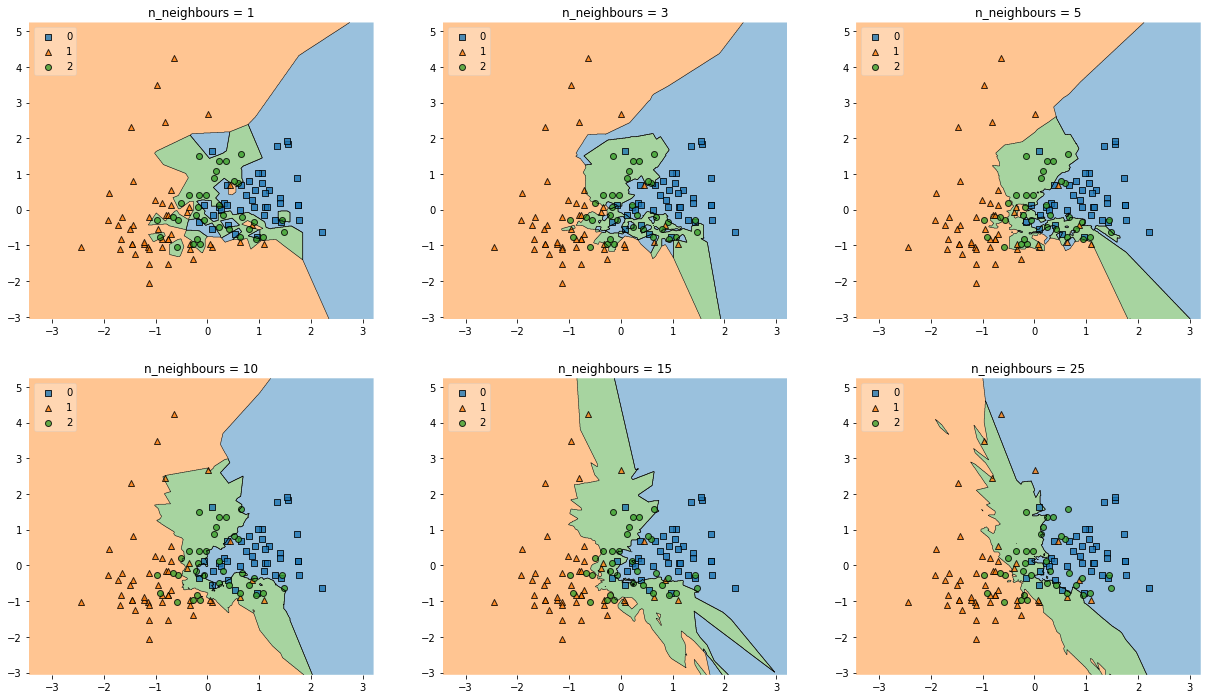

In [410]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(21, 12))

for i, k in enumerate(ks):
    ax = plt.subplot(gs[i//3, i%3])
    plot_decision_regions(X=X_KNNTrain, y=y_train, clf=models[i], legend=2)
    plt.title(f"n_neighbours = {k}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [411]:
# Лучше себя показывает модель, которая хорошо обобщает данные (и при этом не просто усредняет все точки). 
# В данном случае, k = 25 более оптимально, так как форма границы больше похожа на линейную, что говорит о том, 
# что данный классификатор лучше определяют общую тенденцию, а не локальные особенности, 
# которые могут иметь выбросы, давая странную форму для границы между областями

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

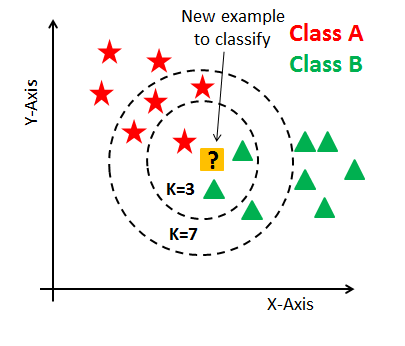

In [412]:
import numpy as np
from collections import Counter 

class KNN:
  def __init__(self, k:int):
    self.k = k
  
  def fit(self, X, y):
    self.data = X
    self.labels = y 
    self.unique = np.unique(y)
  
  def predict(self, X):
    res = np.array([],dtype=float)
    # матрица расстояний m x n  
    # m - количество обучающих данных
    # n - количество строк для предсказания 
    # ячейка [i,j] содержит квадрат евклидового расстояния i элемента обучения до j элемента X 
    dist = np.sum(self.data ** 2, axis=1)[:,np.newaxis] - 2 * self.data @ X.T + np.sum(X ** 2, axis=1)[np.newaxis,:] # a² - 2ab + b² 

    # отсортируем каждый набор расстояний по всем обучающим точкам (вдоль оси обучающих данных)
    idx = np.argsort(dist, axis=0)[:self.k, :] # хранит индексы для label, которые соответствуют ближайшим соседям   
    close_lables = np.repeat(self.labels[:,np.newaxis], X.shape[0], axis=1)[idx.T][:,:,0] # выделяем ближайшие значения label для каждой строки в X
    # вынуждены использовать циклы, так как нет функций для поиска самого популярного значения без них
    res = np.array([Counter(sorted(row, reverse=True)).most_common(1)[0][0] for row in close_lables])
    return res

In [413]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [414]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [36]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [37]:
data.isna().any().any() # False - пропущенных нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [38]:
data.drop(data.columns[0], axis=1, inplace=True) # убираем первую строку, так как она пыталась быть индексом :)
# остальные данные информацию несут, так что превратим категориальные данные в числовые позже  


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [39]:
data.corr()['price'].sort_values()[:-1] # вывели корреляцию с ценой (без последнего значения самой цены)
# лучше всего коррелирует, как и ожидалось, число карат и размеры, которые напрямую связаны с массой.

depth   -0.010647
table    0.127134
z        0.861249
y        0.865421
x        0.884435
carat    0.921591
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [40]:
# правильные порядки порядковых признаков 
# orders = {
#     "color": np.unique(data["color"]),
#     "clarity": np.array([
#         "I1",
#         "SI2",
#         "SI1",
#         "VS2",
#         "VS1",
#         "VVS2",
#         "VVS1",
#         "IF"
#     ]),
#     "cut": np.array([
#         "Fair", 
#         "Good", 
#         "Very Good", 
#         "Premium", 
#         "Ideal"
#     ])
# }

# Ок, понял, что нужно просто get_dummies сделать 

data_ohe = pd.get_dummies(data, ("color", "clarity", "cut"))

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [41]:
X = data_ohe.drop("price", axis=1)
y = data_ohe["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=43)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [42]:
scaler = StandardScaler()
X_LRTrain = scaler.fit_transform(X_train)
X_LRTest = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_LRTrain, y_train)
print("Ошибка на тренировочных данных:", mean_squared_error(reg.predict(X_LRTrain), y_train))
print(f"Оценка точности на тренировочных данных: {round(100 * reg.score(X_LRTrain, y_train),2)}%")
print("Ошибка на тестовых данных:", mean_squared_error(reg.predict(X_LRTest), y_test)) 
print(f"Оценка точности на тестовых данных: {round(100 * reg.score(X_LRTest, y_test),2)}%")

Ошибка на тренировочных данных: 1265088.8668979763
Оценка точности на тренировочных данных: 92.01%
Ошибка на тестовых данных: 1304401.2564658392
Оценка точности на тестовых данных: 91.89%


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [44]:
print(pd.DataFrame(data=zip(X.columns, reg.coef_), columns=("Parameter", "Coefficient") ))
# самый большой порядок имеют коэффициенты параметров, которые мы получили методом OneHotEncoding 
# из численных параметров, ожидаемо самый большой коэффициент имеет значение числа карат

# вот, кстати, график предсказанной зависимости только по числу карат 
#  
# plt.scatter(X["carat"], y, alpha=0.05, s=1)
# x_min = min(X["carat"])
# x_max = max(X["carat"])
# x = np.linspace(x_min, x_max / 2, 100)
# plt.plot(x, x * reg.coef_[0], c=(1, 0.5, 0))
# plt.show()

          Parameter   Coefficient
0             carat  5.310494e+03
1             depth -9.339037e+01
2             table -5.966541e+01
3                 x -1.104042e+03
4                 y -6.256023e+00
5                 z -2.200174e+01
6        color_Fair -4.300719e+12
7        color_Good -7.290781e+12
8       color_Ideal -1.243317e+13
9     color_Premium -1.106969e+13
10  color_Very Good -1.059252e+13
11        clarity_D -6.036021e+14
12        clarity_E -7.039590e+14
13        clarity_F -6.976806e+14
14        clarity_G -7.412660e+14
15        clarity_H -6.597218e+14
16        clarity_I -5.465791e+14
17        clarity_J -4.043094e+14
18           cut_I1  2.641888e+14
19           cut_IF  4.069704e+14
20          cut_SI1  9.891936e+14
21          cut_SI2  8.707194e+14
22          cut_VS1  8.293365e+14
23          cut_VS2  9.661303e+14
24         cut_VVS1  5.809830e+14
25         cut_VVS2  6.747097e+14


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [45]:
from sklearn.linear_model import Ridge, Lasso 
ridge = Ridge().fit(X_LRTrain, y_train)
lasso = Lasso().fit(X_LRTrain, y_train)

pd.DataFrame(data=zip(X.columns, ridge.coef_, lasso.coef_), columns=("Parameter", "Coefficients Ridge", "Coefficient Lasso") )
# Здесь видно, что регуляризация все поправила и теперь действительно самый важны параметр массы коррелирует с ценой, а параметры из OneHotEncoding получили соответствующие веса 
# Так чже можно заметить, что cut_IF, cut_VVS2/1 положительно коррелируют с ценой (IF, VVS1, VVS2 - хорошие качества среза)
# аналогично, соответствующие веса у цвета и у частоты от плохого J к хорошему D  

,Parameter,Coefficients Ridge,Coefficient Lasso
0,carat,5305.512704,5263.560663
1,depth,-93.315862,-90.285498
2,table,-59.912727,-58.553071
3,x,-1098.577437,-1059.679870
4,y,-6.956063,-4.675192
5,z,-22.565583,-23.655930
6,color_Fair,-116.199541,-122.257553
7,color_Good,-41.729375,-51.976874
8,color_Ideal,53.952044,35.752645
9,color_Premium,17.061497,0.000000


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

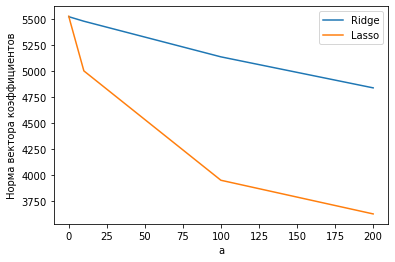

In [46]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


alpha = [0.1, 1, 10, 100, 200]

@ignore_warnings(category=ConvergenceWarning) # некоторые параметры alpha нарушают сходимость 
def get_norm(alpha):
    ls = []
    rs = []
    for a in alpha:
        ridge = Ridge(alpha=a).fit(X_LRTrain, y_train)
        lasso = Lasso(alpha=a).fit(X_LRTrain, y_train)
        rs.append(np.linalg.norm(ridge.coef_))
        ls.append(np.linalg.norm(lasso.coef_))
    return rs, ls 

rs, ls = get_norm(alpha)

plt.plot(alpha, rs, label="Ridge")
plt.plot(alpha, ls, label="Lasso")
plt.xlabel("a")
plt.ylabel("Норма вектора коэффициентов")
plt.legend()
plt.show()
# Lasso опустил веса при увеличении alpha
# Ridge не опускает значения весов, что говорит о том, что он приблизительно сохраняет их значение одинаковыми по порядку   
# Lasso удобнее использовать для выбора важных параметров, так как он больше стремиться уменьшить норму вектора коэффициентов, то есть он лучше занизит менее полезные веса  

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [50]:
from sklearn.linear_model import LassoCV 
# кросс-валидацию сделаем только на обучающей выборке (можно было бы и на всей, так как она уже включает разделение на тестовую и тренировочную выборку)
model = LassoCV(alphas=alpha, cv=5, max_iter=10**4).fit(X_LRTrain, y_train)
err = model.mse_path_ 
alphas = model.alphas_
print(alphas[np.argmin(np.mean(err, axis=1))])

1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [56]:
model = Lasso(alpha=1).fit(X_LRTrain, y_train)
pd.DataFrame(data=zip(X.columns, model.coef_), columns=("Parameter", "Coefficient"))
# самыми информативными оказался параметр числа карат и он имеет соответственно наибольший вес (цена, очевидно, зависит от массы), аналогично ширина x имеет большое значение 
# так же важны параметры чистоты clarity и качества цвета color. Самый большой вес из всех категориальных признаков получило качество среза (cut) - это параметры качества, которые сильно влияют на цену 
# признаки размеров z, y, table и глубины (depth) оказались менее важными 

,Parameter,Coefficient
0,carat,5263.560663
1,depth,-90.285498
2,table,-58.553071
3,x,-1059.679870
4,y,-4.675192
5,z,-23.655930
6,color_Fair,-122.257553
7,color_Good,-51.976874
8,color_Ideal,35.752645
9,color_Premium,0.000000


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [58]:
print("Ошибка обычной регрессии:", mean_squared_error(reg.predict(X_LRTest), y_test))
print(f"Оценка точности обычной регрессии: {round(100 * reg.score(X_LRTest, y_test),2)}%")

print("Ошибка Lasso:", mean_squared_error(model.predict(X_LRTest), y_test))
print(f"Оценка точности Lasso: {round(100 * model.score(X_LRTest, y_test),2)}%")

# Несмотря на то, что Lasso выкинуло часть менее важных весов, они все же оказались "важны" при оценке, что делает обычную модель регрессии точнее 
# Но важность может быть и результатом "излишнего" обучения. С лишними параметрами модели проще подстроиться под обучающую выборку. 
# Учитывая, что данные мы брали из перемешенного набора, модель могла встретить при обучении значения, похожие на те, что попались в тестовой.  
#
# То, что ошибка может быть выше у Lasso можно понять из того, что она ищет не просто коэффициенты, которые минимизируют ошибку, 
# а коэффициенты, которые минимизируют так же норму вектора на выходе, что дает отклонение от минимума ошибки.

Ошибка обычной регрессии: 1304401.2564658392
Оценка точности обычной регрессии: 91.89%
Ошибка Lasso: 1304679.0395002384
Оценка точности Lasso: 91.89%
